In [2]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from utils import load_datasets
plt.rcParams['axes.linewidth']= 3.
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (16,16)


In [3]:
SDSS, TNG50, TNG, Illustris = load_datasets(orig=True)

/scratch/lzanisi/pixel-cnn/analysis/utils.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  SDSS['LCentSat'] = SDSS['LCentSat'].replace(to_replace=2, value=0)


In [4]:
from scipy.stats import binned_statistic_2d

In [5]:


SDSS_cen = SDSS.query('LCentSat==1')
TNG_cen = TNG.query('LCentSat==1')
TNG50_cen = TNG50.query('LCentSat==1')
Illustris_cen = Illustris.query('LCentSat==1')

SDSS_sat = SDSS.query('LCentSat==0')
TNG_sat = TNG.query('LCentSat==0')
TNG50_sat = TNG50.query('LCentSat==0')
Illustris_sat = Illustris.query('LCentSat==0')

SDSS_Q = SDSS.query('sSFR<-11')
SDSS_SF = SDSS.query('sSFR>-11')

TNG_Q = TNG.query('sSFR<-11')
TNG_SF = TNG.query('sSFR>-11')

TNG50_Q = TNG50.query('sSFR<-11')
TNG50_SF = TNG50.query('sSFR>-11')

Illustris_Q = Illustris.query('sSFR<-11')
Illustris_SF = Illustris.query('sSFR>-11')


SDSS_cen_Q = SDSS_cen.query('sSFR<-11') #ToDo: TNG50 SF & Q; cen & sat
TNG_cen_Q = TNG_cen.query('sSFR<-11')
TNG50_cen_Q = TNG50_cen.query('sSFR<-11')
Illustris_cen_Q = Illustris_cen.query('sSFR<-11')

SDSS_sat_Q = SDSS_sat.query('sSFR<-11')
TNG_sat_Q = TNG_sat.query('sSFR<-11')
TNG50_sat_Q = TNG50_sat.query('sSFR<-11')
Illustris_sat_Q = Illustris_sat.query('sSFR<-11')

SDSS_cen_SF = SDSS_cen.query('sSFR>-11')
TNG_cen_SF = TNG_cen.query('sSFR>-11')
TNG50_cen_SF = TNG50_cen.query('sSFR>-11')
Illustris_cen_SF = Illustris_cen.query('sSFR>-11')

SDSS_sat_SF = SDSS_sat.query('sSFR>-11')
TNG_sat_SF = TNG_sat.query('sSFR>-11')
TNG50_sat_SF = TNG50_sat.query('sSFR>-11')
Illustris_sat_SF = Illustris_sat.query('sSFR>-11')

In [81]:
TNG_temp = TNG_sat[['Mstar','Mhalo']]
idx = []
for row in SDSS_sat[['Mstar','Mhalo']].iterrows():   #iterate over SDSS satellites
    Mh = row[1]['Mhalo']
    Ms = row[1]['Mstar']
    t = TNG_temp.query(f'{Mh-0.2}<Mhalo<{Mh+0.2} & {Ms-0.2}<Mstar<{Ms+0.2}')
    if t.shape[0]!=0: # the query is not null, there is at least one match in TNG for this SDSS galaxy
        index = t.index
        idx.extend(index)
        TNG_temp = TNG_temp.drop(index=index)  # . The indices not dropped are the galaxies that need to be taken out to achieve match to SDSS
        

In [82]:
TNG_bad = TNG_sat.ix[TNG_temp.index]


/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2ad1d9978>,
      dtype=object)

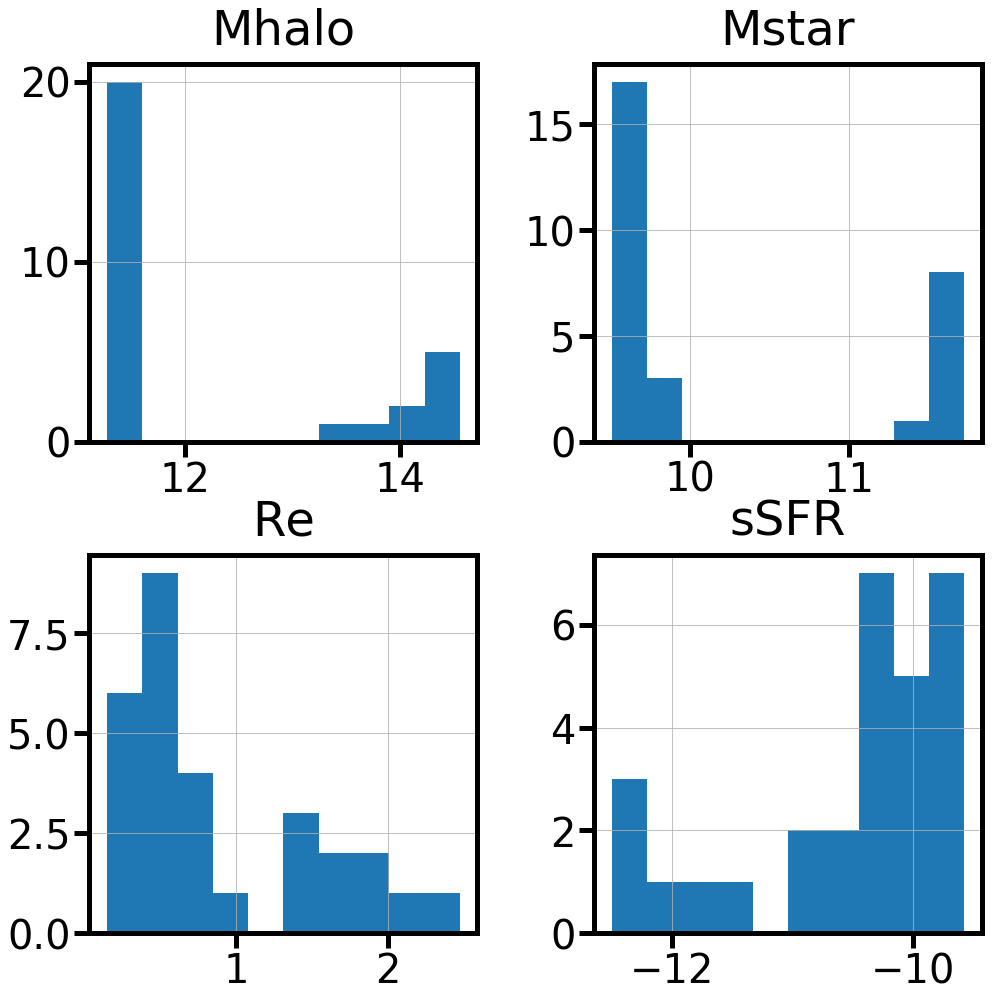

In [83]:
TNG_bad[['Mhalo','Mstar','Re','sSFR']].hist()

In [63]:
TNG_bad = TNG50_sat.ix[TNG_temp.index]
len(TNG_bad)

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


11

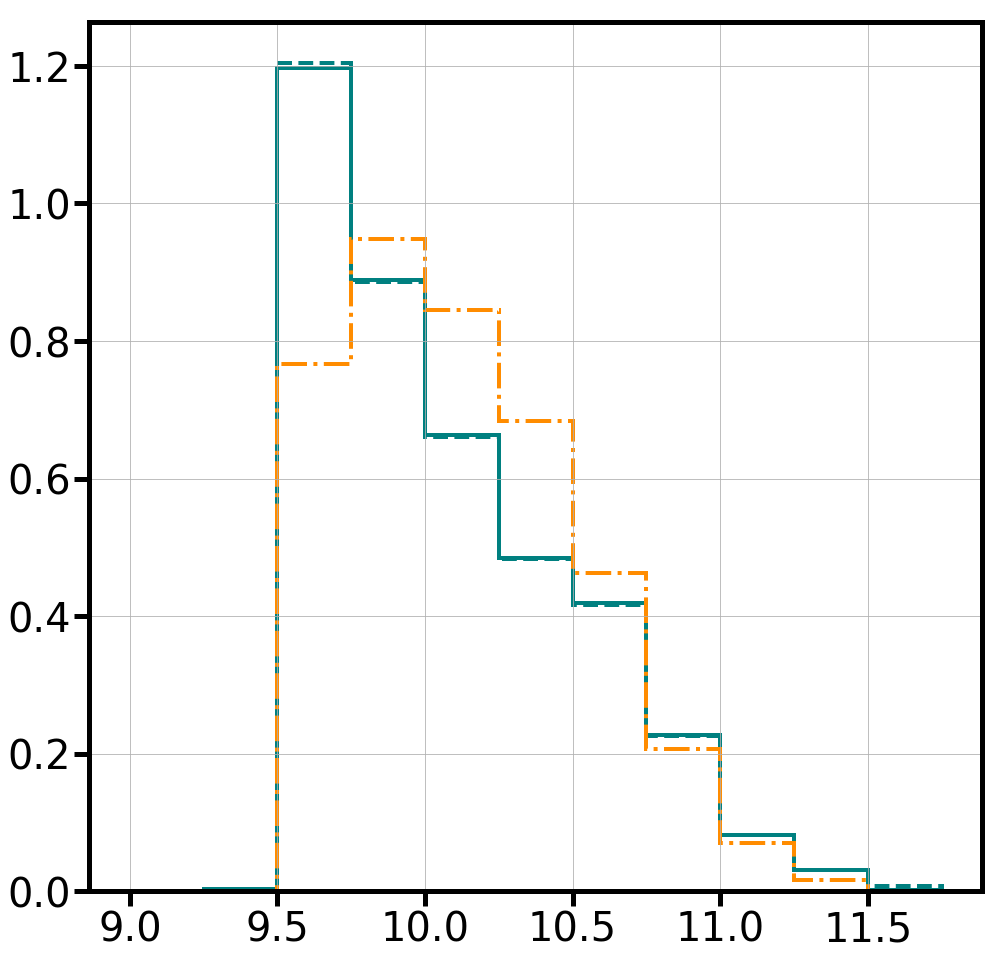

In [49]:
TNG_sat_good = TNG_sat.drop(index=TNG_temp.index)
bins=np.arange(9,12,0.25)
TNG_sat_good['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True, ls='-')
TNG_sat['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True, ls='--')
SDSS_sat['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ls='-.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c24cc198>]],
      dtype=object)

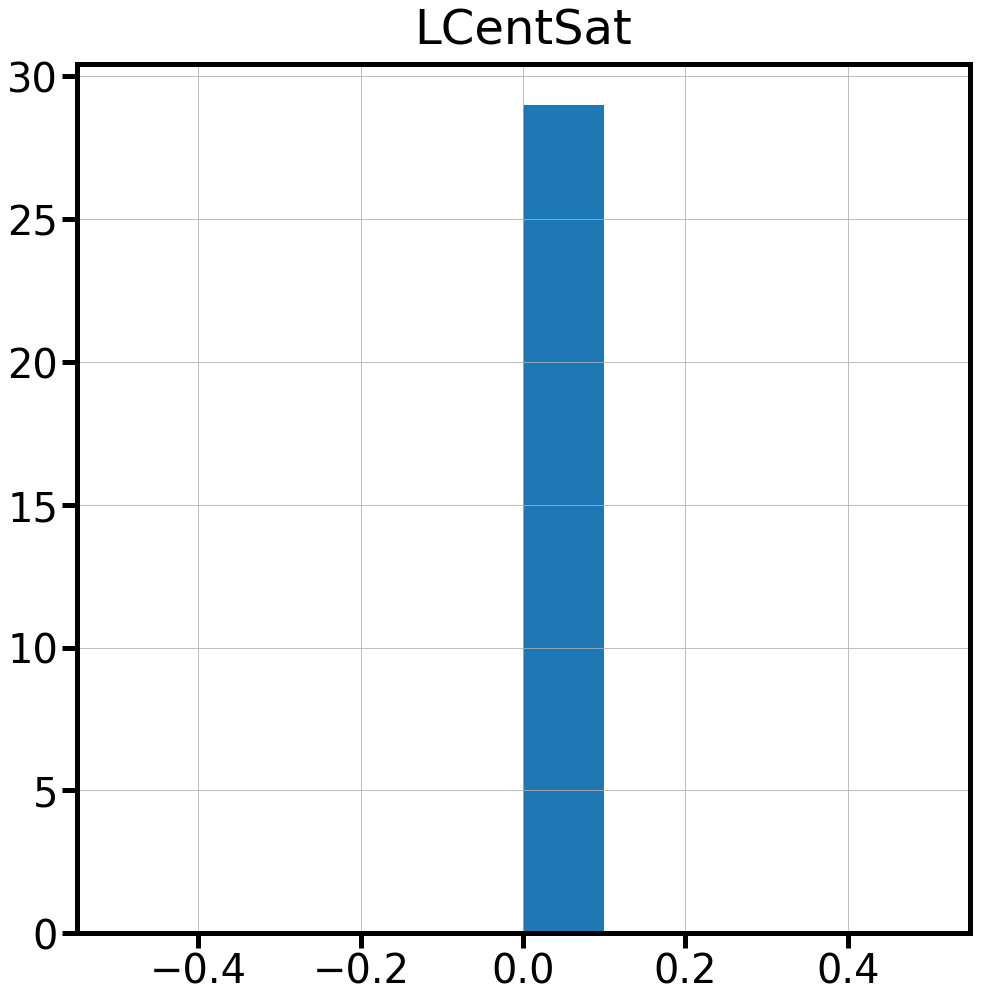

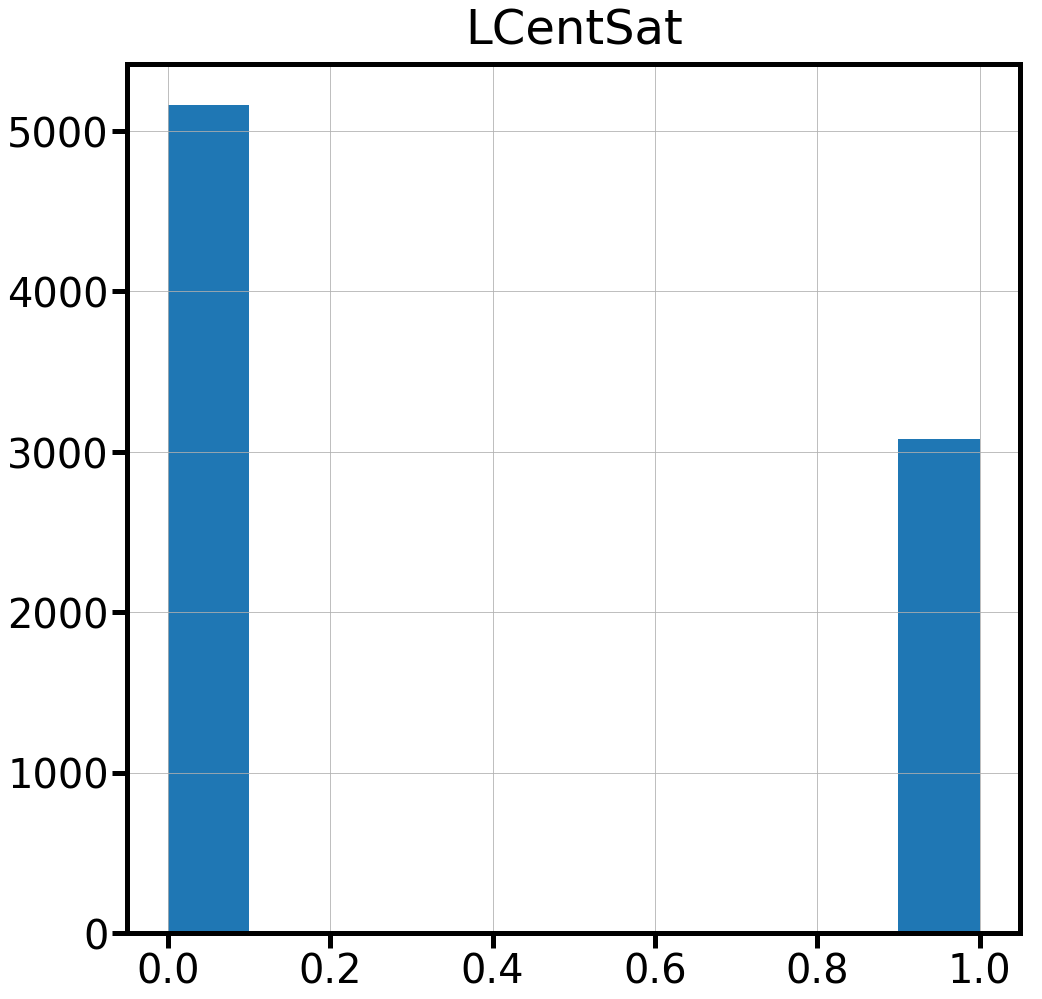

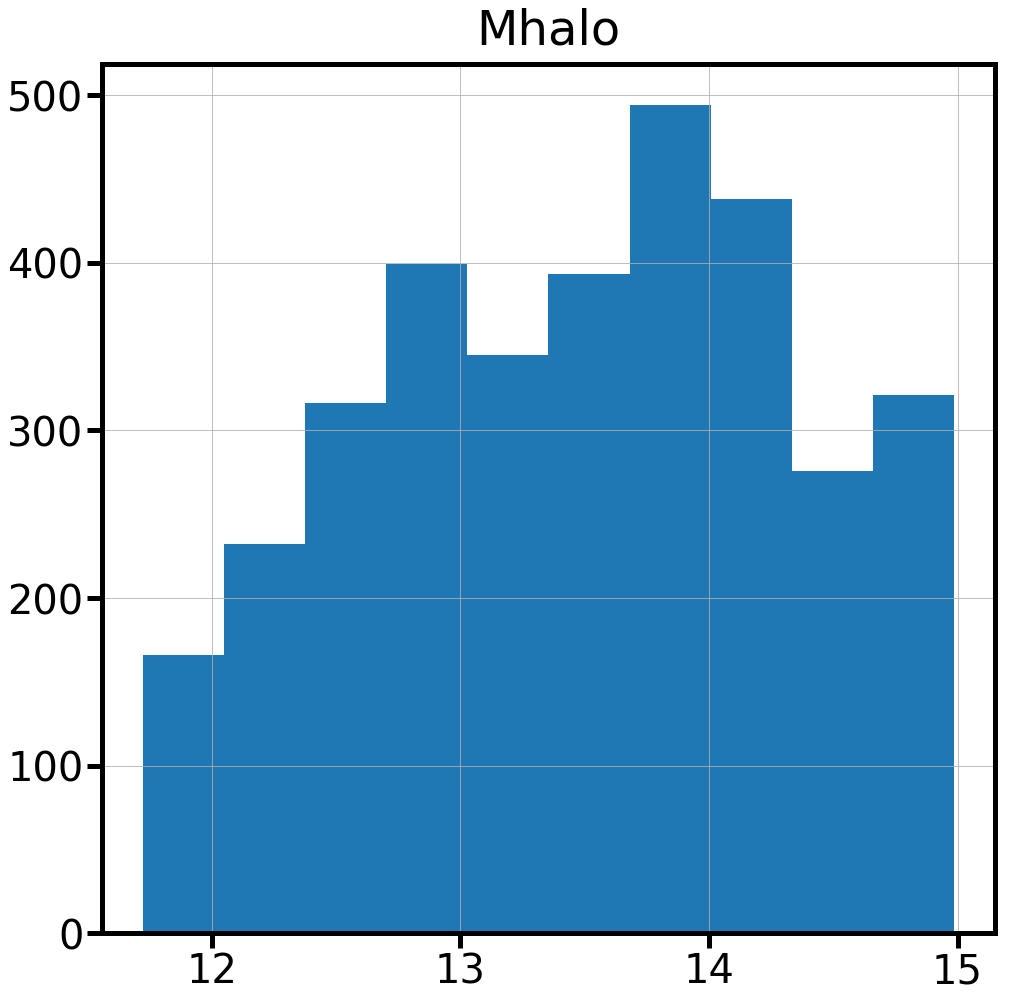

In [45]:
TNG_bad.hist('LCentSat')
mhalomin = SDSS.query('Mhalo>0')['Mhalo'].min()
TNG.query(f'Mhalo>{mhalomin}').hist('LCentSat')
SDSS_sat.query(f'Mhalo>{mhalomin}').hist('Mhalo')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c302c710>]],
      dtype=object)

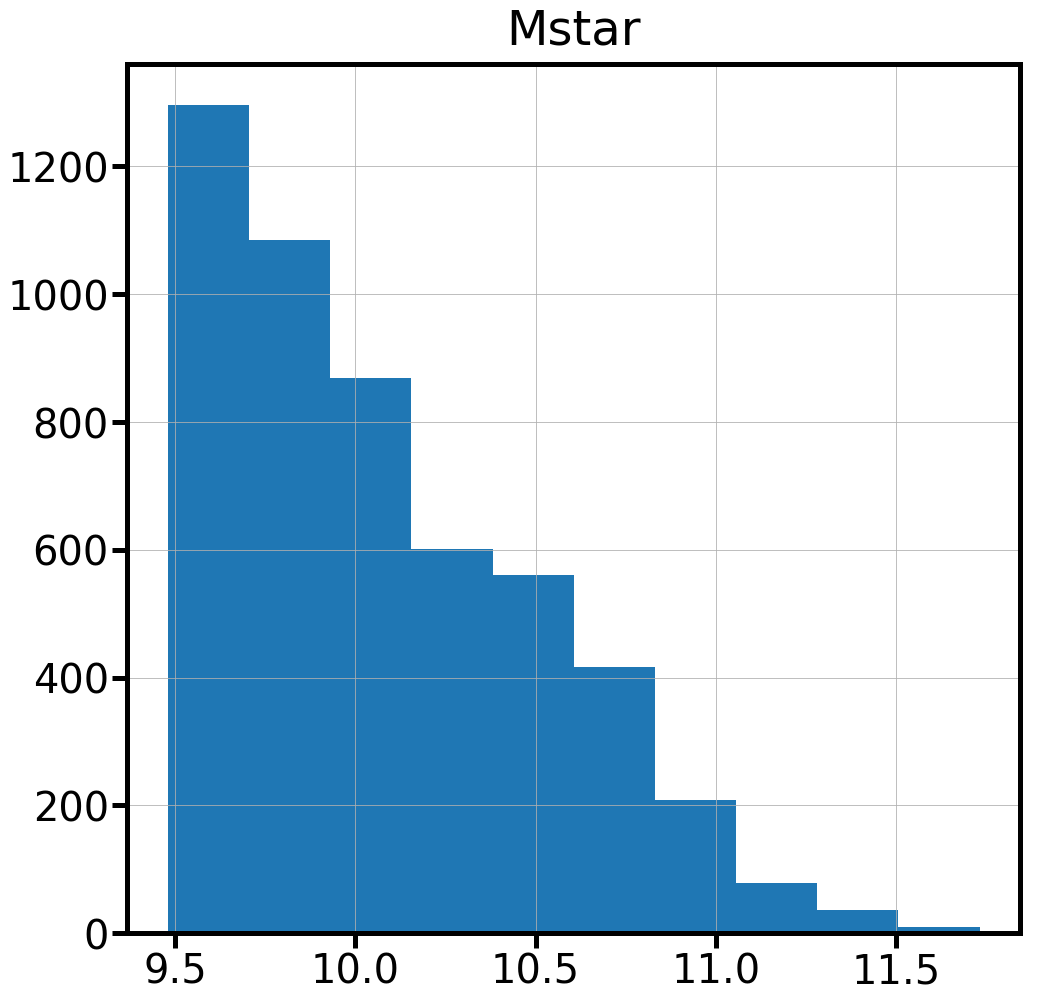

In [37]:
TNG.query(f'Mhalo>{mhalomin} & LCentSat==0').hist('Mstar')